# EDA ANALYSIS

## Statistical Theory

### Count
Is the total count of values in a variable or column. This value is usefull to check it against the unique values to understand the ratio for the total entries. Using One-Hot encoding will use the same result with the sum of the values.

* df['column'].count()
* df['column'].nunique()
* df.nunique()

### Maximum
Is the maximum value of a variable. This allows to understand if there are outliers and if this case, it is suggested to do a graphic checking this values. This does not apply for binary variables (one-hot encoding)

* df['column'].max()
* df.max()

### Minimum
Is the minimum value of a variable. This allows to understand if there are outliers and if this case, it is suggested to do a graphic checking this values. This does not apply for binary variables (one-hot encoding)

* df['column'].min()
* df.min()

### Mean (simple average)
Is the statistical measurment of the mean average value. This value is calculated as the sum of all the 
values, divided by the total number (count) of the values. This does not apply for binary variables (one-hot encoding)

* df['column'].mean()
* df.mean()

### Median
Is the statistical measurement of the median average value. This value is calculated as the middle value of all the items placed in an array, if it is odd, or the sum divided by two of the two middle values, it it is odd. This measurement is not affected by  outliers. This does not apply for binary variables (one-hot encoding)

* df['column'].median()
* df.median()

### Mode
Is the statistical measurment of the most frequent or often value. This value is calculated as the value that is most repeated in an array. This measurement is not affected by outliers. This does not apply for binary variables (one-hot encoding)

* df['column'].mode()
* df.mode()

### Skewness/Symmetry or Balanced Information
This allows to see if the information is skewed or not balanced, for this:
* if mean > median -> Skewed to the right: Outliers to the right
* mean ~ median -> Symmetrical (no significant or balanced outliers)
* mean < median -> Skewed to the left: Outliers to the left

* Analize mean vs median values

### Variance (sigma^2 or s^2)
Is the statistical measurement of the data dispersion around the mean values. It is calculated as sigma ^2, that is the delta between each value and the median elevated to the square and divided by the population count (if it is a sample, then it is divided by n-1). It is elevated to the square so all deltas are positive, thus, it gives us a number on how "dispersed" are the values. This is affected by outliers, specially high number outliers.

* df['column'].var()

### Standard Deviation (sigma or s)
Is more meaningful than the variance. It is root square of the variance, thus, it has the same unit of measurement than the sample. This allows to give meaning to the value

* df['column'].std()

### Coeficient of Variation (CV) or Relative Standard Deviation
It is the standard deviation divided by the mean of the values. This allows to compare the variation of values between different units (has no unit of measurement)

## Measures of Relationship between variables

### Covariance (Cov(x,y))
Can be positive, zero or negative. It is the measurement on how two variables are related , meaning that while one variable grows, the second one grows, shrinks or has no change.

> _> 0 -> The two variables move together (direct relationship)

> _< 0 -> The two variables move in oppositve direction (inverse relationship)

> _~ 0 -> The variables are independent

It is calculated by the multiplication of the delta of each X and Y value with its mean value, and then divided by the sample size - 1 (or population size).

*(Xi-Xmean)x(Yi-Ymean)/(n-1)*

The problem of the Covariance is that the value can be anything and has no relative meaning 

* df['column'].cov()

### Correlation
It adjust the covariance, by regularizing it to a value between [-1 to 1], following the similar analysis of covariance, but between a certain range.

It is calculated as the covariance of two variables, divided by the product of the standard deviation of both variables. This will always be a number between -1 (imperfect or inverse correlation), 0 (no relationship) and 1 (perfect or direct relationship).

*Cov(x,y) / (s(x) x s(y))*

* df['column'].corr()

### Quantiles (25% 50% 75% 90% 99%)
It is the analysis of the values in the amount of the percentage of the count of the values, ordered by size. This allows to understand where are distributed the values along the total amount of entries

* df['column'].quantile()

In [1]:
#Importamos las librerías y seteamos opciones generales
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_rows", None)
plt.style.use('seaborn-whitegrid')

In [2]:
#Se lee el dataframe final
df = pd.read_csv("Dataframe_final")

In [3]:
#Se obtiene la información del dataframe
df.shape

(70030, 71)

In [4]:
#Se procede a ver los typos de datos de cada columna del dataframe, verificando que no existan
#valores nulos. Se encuentran solo variables numéricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70030 entries, 0 to 70029
Data columns (total 71 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      70030 non-null  int64  
 1   points                          70030 non-null  int64  
 2   price                           70030 non-null  float64
 3   Year                            70030 non-null  int64  
 4   Lat_x                           70030 non-null  float64
 5   Long_x                          70030 non-null  float64
 6   temp_anual                      70030 non-null  float64
 7   temp_max_anual                  70030 non-null  float64
 8   temp_min_anual                  70030 non-null  float64
 9   pre_anual                       70030 non-null  float64
 10  etp_anual                       70030 non-null  int64  
 11  country_Argentina               70030 non-null  int64  
 12  country_Australia               

In [5]:
#verificamos los valores únicos en el dataframe
df.nunique()

Unnamed: 0                        70030
points                               21
price                               344
Year                                 13
Lat_x                                87
Long_x                              223
temp_anual                         1323
temp_max_anual                     1392
temp_min_anual                     1334
pre_anual                          3371
etp_anual                           435
country_Argentina                     2
country_Australia                     2
country_Austria                       2
country_Bosnia and Herzegovina        2
country_Brazil                        2
country_Bulgaria                      2
country_Canada                        2
country_Chile                         2
country_China                         2
country_Croatia                       2
country_Cyprus                        2
country_Czech Republic                2
country_England                       2
country_France                        2


Con esto verificamos que existen:
* 21 valores de puntaje (80 a 100 inclusive)
* 13 valores de años (2000 a 2012 inclusive)
* Valores Binarios para los datos de one-hot encoding

In [6]:
#los valores máximos que pueden ser outliers o erroneos
df.iloc[:,:11].max()

Unnamed: 0        70029.00
points              100.00
price              2500.00
Year               2012.00
Lat_x                52.25
Long_x              176.75
temp_anual           26.91
temp_max_anual       33.09
temp_min_anual       21.70
pre_anual          2791.70
etp_anual          2106.00
dtype: float64

Se encuentran valores aceptables en todas las variables. Para el caso de precio es posible tener un vino de alto precio (USD $2200), valores de temperatura correctos y de precipitación anual

In [7]:
#Los valores mínimos que pueden ser outliers o erroneos
df.iloc[:,:11].min()

Unnamed: 0           0.00
points              80.00
price                4.00
Year              2000.00
Lat_x              -45.25
Long_x            -123.75
temp_anual          -0.88
temp_max_anual       2.75
temp_min_anual      -9.80
pre_anual            9.00
etp_anual          378.00
dtype: float64

No se encuentran valores mínimos erroneos o atípicos. Se encuentran valores de al menos USD $4 como precio mínimo lo que es correcto, valores de temperatura correctos y de precipitación anual

In [8]:
#Los valores promedio (mean)
df.iloc[:,:11].mean()

Unnamed: 0        35014.500000
points               88.313965
price                37.902842
Year               2009.066700
Lat_x                32.218406
Long_x              -57.084014
temp_anual           12.988201
temp_max_anual       18.630808
temp_min_anual        7.390167
pre_anual           779.388079
etp_anual          1046.453506
dtype: float64

* En este caso el promedio de los puntos está en la parte baja pero no muy alejada de la medida central "90"
* El promedio del precio se sitúa en la parte baja de los valores extremos, por lo que se puede inferir que la mayoría de vinos calificados son de precio relativamente bajo
* El promedio del año es de 2009, lo que quiere decir que la mayoría de vinos calificados están con una vida de al menos 8 años (winemag es un dataframe del año 2017)
* El promedio de la temperatura promedio se situa en 13 grados, que es una temperatura relativamente baja
* El promedio de la temperatura máxima anual es de 18 grados, que es una temperatura relativamente baja
* El promedio de la temperatura mínima anual es de 7 grados, que es una temperatura relativamente baja
* El promedio de la precipitación anual es de 7,8 cm, lo que es una precipitación relativamente baja

In [9]:
#La mediana de los valores (median)
df.iloc[:,:11].median()

Unnamed: 0        35014.50
points               88.00
price                28.00
Year               2010.00
Lat_x                39.75
Long_x              -74.25
temp_anual           13.61
temp_max_anual       18.87
temp_min_anual        7.52
pre_anual           737.40
etp_anual          1047.00
dtype: float64

* La mediana del puntaje es muy cercano a su promedio, por lo cual es una variable balanceada
* La mediana de precio es de USD $28, mucho menor que su promedio, por lo cual inferimos que tenemos valores de precios bastante altos que afectaron la mediana y tiene cierto desbalanceo
* La mediana de años es de 2010, lo que posiblemente indique que se tiene un pqueño desbalanceo hacia los valores bajos (es decir, se tienen más vinos que son más añejos que recientes)
* La mediana de la temperatura promedio anual es muy cercana al promedio de la temperatura promedio, por lo cual inferimos que se tienen valores balanceados
* La mediana de la temperatura máxima anual es muy cercana al promedio de la temperatura máxima, por lo cual inferimos que se tienen valores balanceados
* La mediana de la temperatura mínima anual es muy cercana al promedio de la temperatura mínima, por lo cual inferimos que se tienen valores balanceados
* La mediana de la precipitación anual es relativamente cercana al promedio de la precipitación promedio, por lo cual inferimos que se tienen valores balanceados
* La mediana de la evotranspiración anual es muy cercana al promedio de la evotranspiración promedio, por lo cual inferimos que se tienen valores balanceados

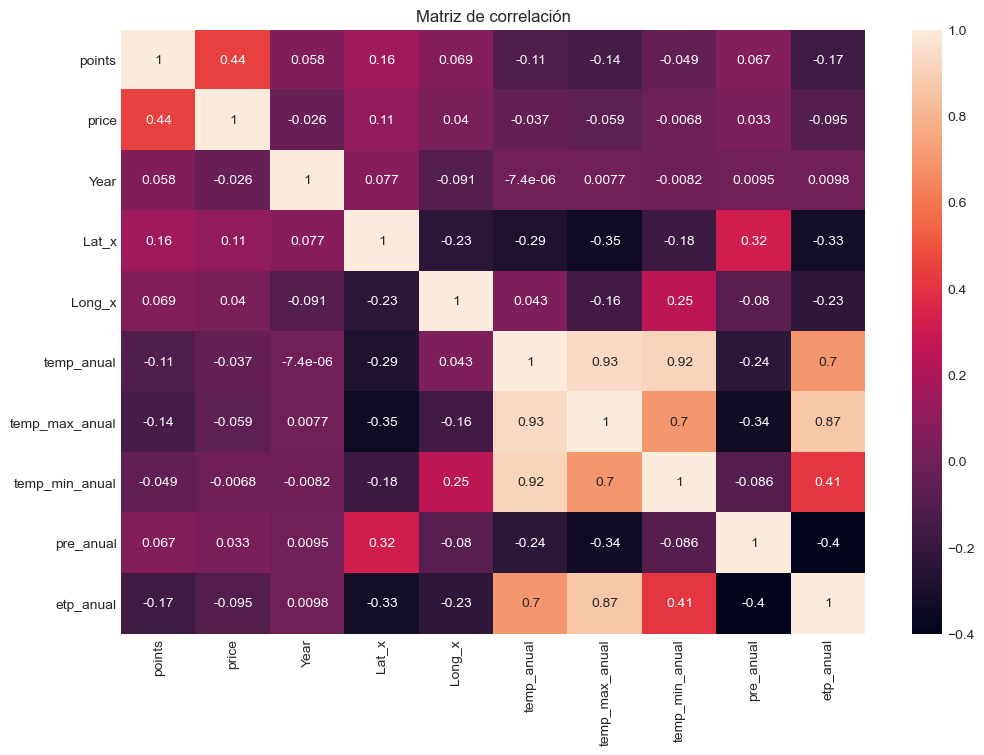

In [10]:
df_simple = df.iloc[:,1:11]
corrMatrix = df_simple.corr()
plt.figure(figsize=(12,8), dpi= 100)
sns.heatmap(corrMatrix, annot=True)
plt.title("Matriz de correlación")
plt.show()

**Conclusiones** Entre las vairables más interesantes en lamatriz, se encuentran:

*Puntos* Cierta correlación con el precio, una baja correlación con la Latitud y una correlación baja inversa con la temperatura anual máxima y evotranspiración anual.

*Precio* Cierta corrleación con la Latitud

*Año* No se encuentra correlación alguna

*Latitud* Alguna correlación inversa con la temperatura promedio y máxima, y una correlación con la precipitación anual

*Longitud* Alguna correlación con la temperatura mínima anual y parte de correlación inversa con la precipitación anual

*temp anual promedio* Correlación con la temperatura máxima anual y mínima anual, así como con la evotranspiración, y alguna correlación inversa con la Latitud

*temp max anual* Correlación con la temperatura mínima anual y la evotranspiración. Correlación inversa con la Latitud

*temp min anual* Alguna Correlación con la evotranspiración y Longitud

*Precipitación anual* Correlaciones con las Latitudes, y correlación inversa con la temperatura máxima

*evotranspiración anual* Correlacion inversa con la Latitud, y correlaciones con la temperatura anual promedio, temperaturas máximas y mínimas

## Visualizacion

### Histogramas

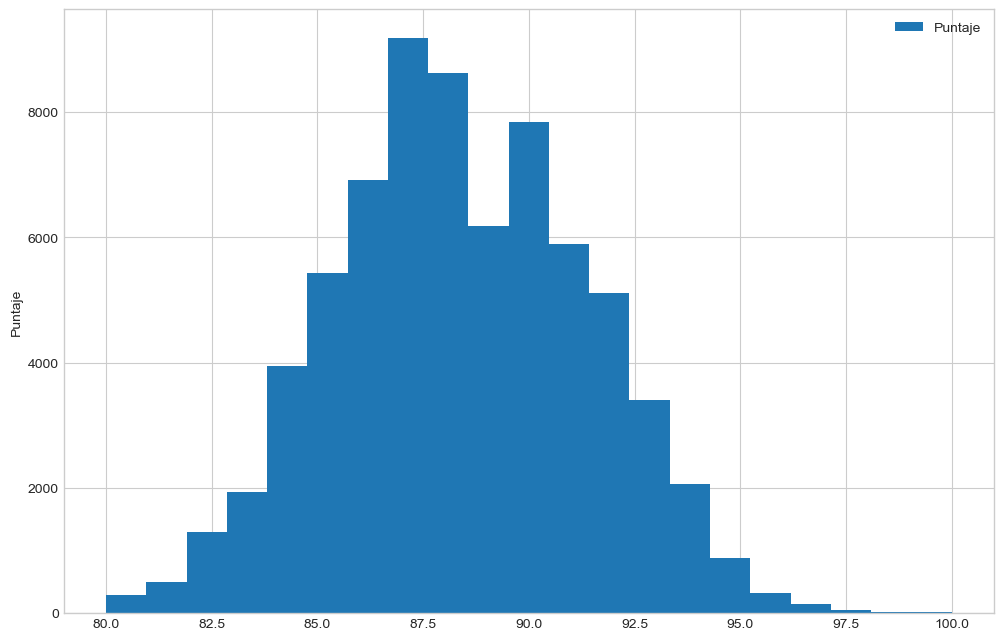

In [11]:
#Histograma de Puntos
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['points'], bins=21, label="Puntaje")
plt.legend()
plt.ylabel("Puntaje");

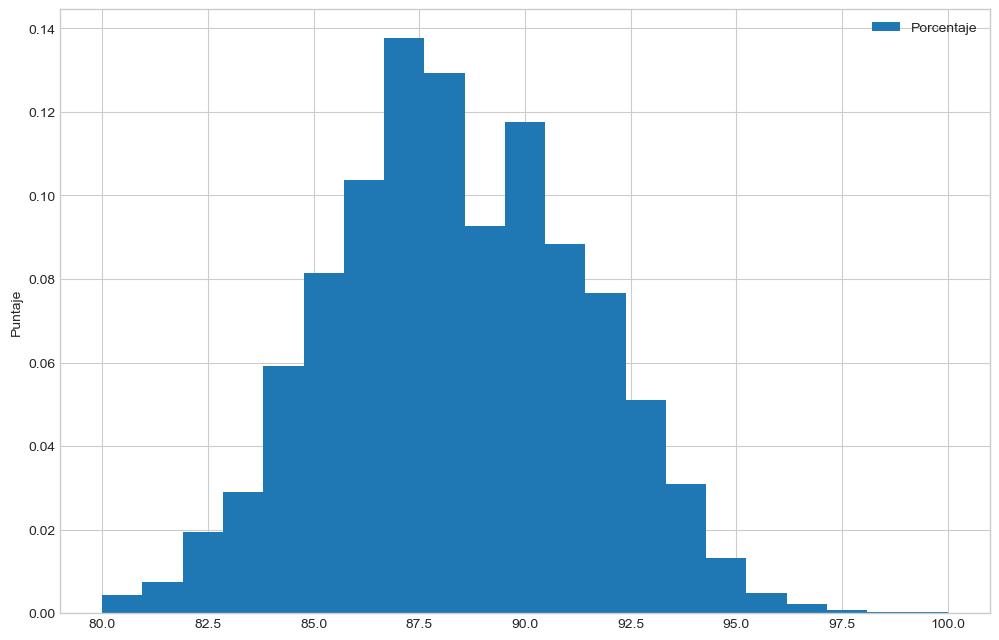

In [12]:
#Puntaje en porcentajes
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['points'], bins=21, label="Porcentaje", density=True)
plt.legend()
plt.ylabel("Puntaje");

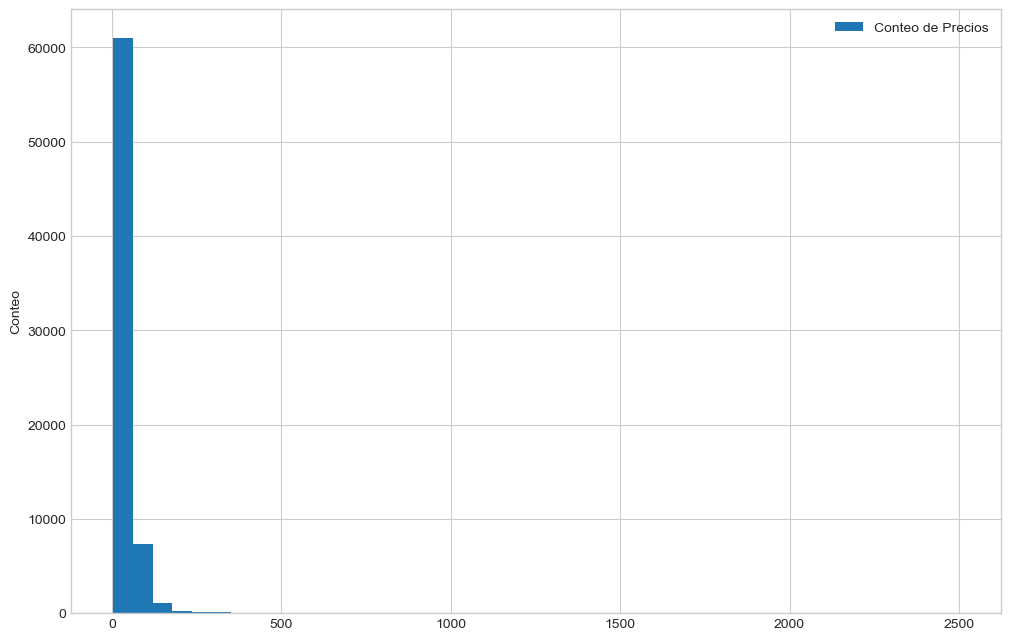

In [13]:
#Histograma de Precios
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['price'], bins=43, label="Conteo de Precios")
plt.legend()
plt.ylabel("Conteo");

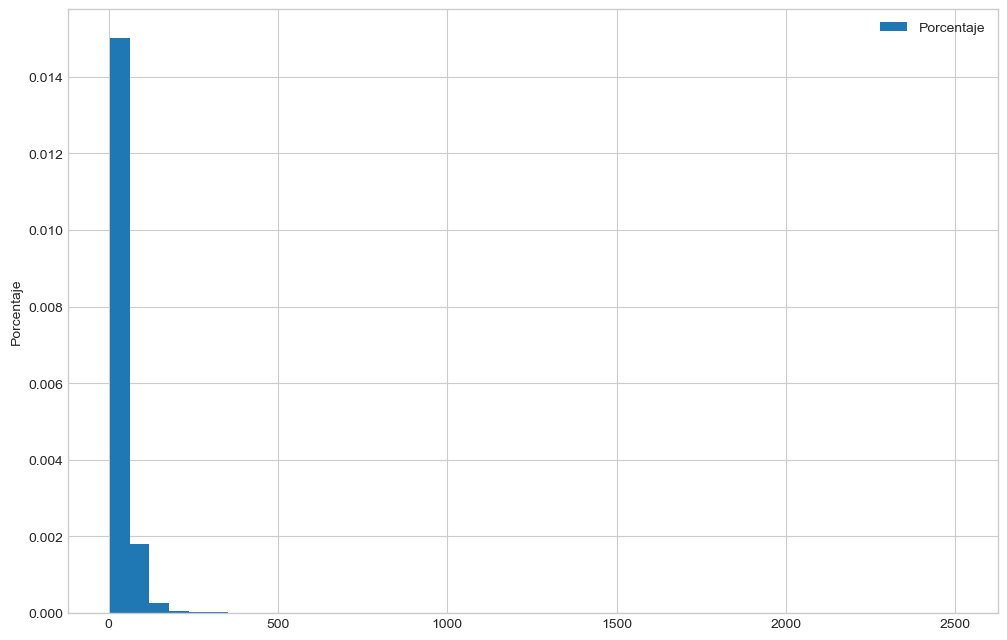

In [14]:
#Precio en porcentajes, por que no muestra los porcentajes correctos?
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['price'], bins=43, label="Porcentaje", density=True)
plt.legend();
plt.ylabel("Porcentaje");

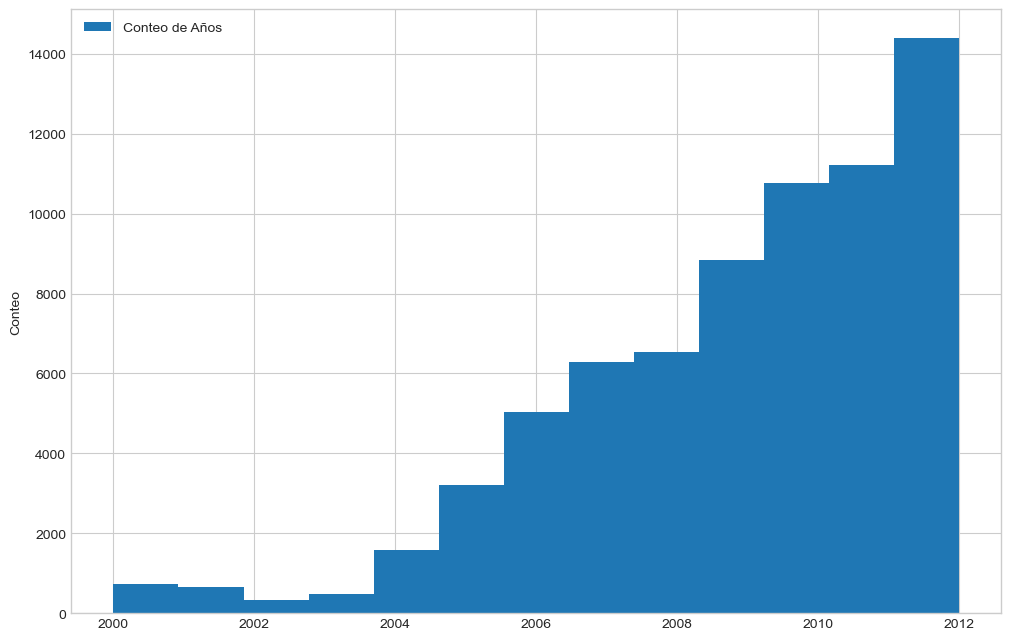

In [15]:
#Histograma de Años
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['Year'], bins=13, label="Conteo de Años")
plt.legend()
plt.ylabel("Conteo");

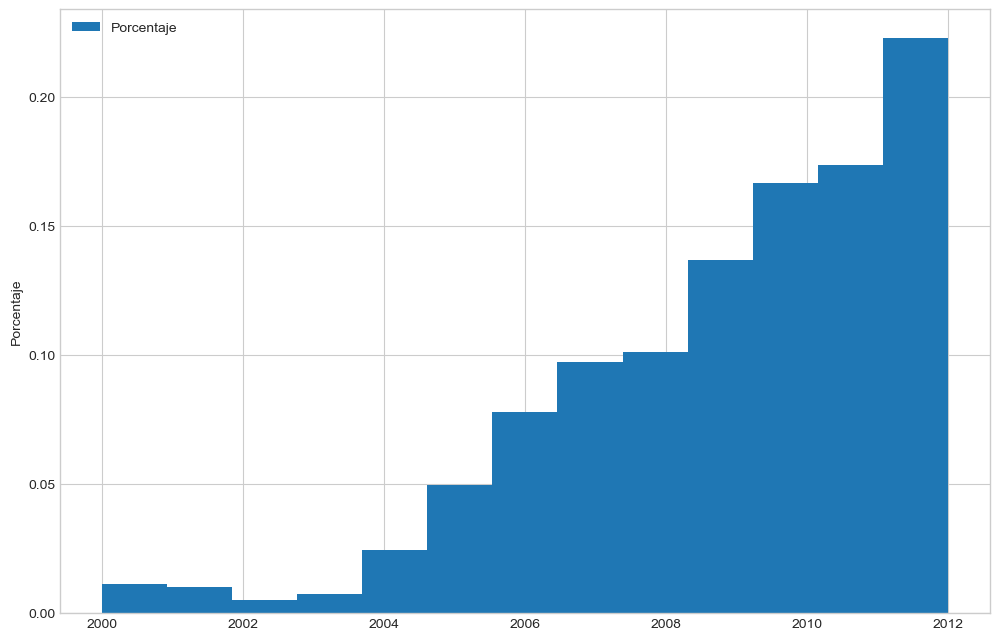

In [16]:
#Años en porcentajes
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['Year'], bins=13, label="Porcentaje", density=True)
plt.legend();
plt.ylabel("Porcentaje");

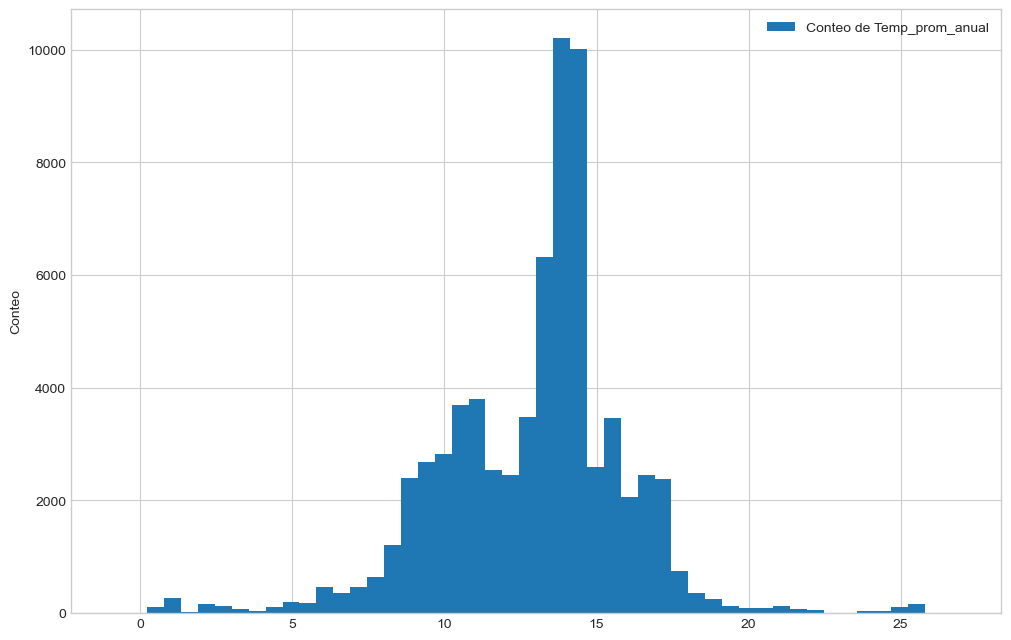

In [17]:
#Histograma de Temperatura promedio anual
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['temp_anual'], bins=50, label="Conteo de Temp_prom_anual")
plt.legend()
plt.ylabel("Conteo");

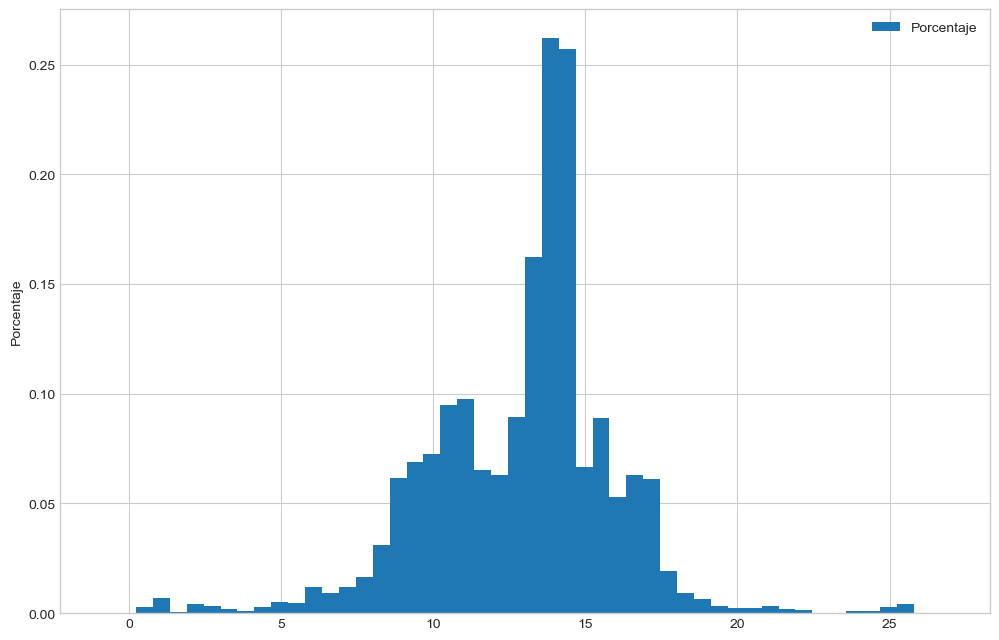

In [18]:
#Temp_anual en porcentajes
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['temp_anual'], bins=50, label="Porcentaje", density=True)
plt.legend();
plt.ylabel("Porcentaje");

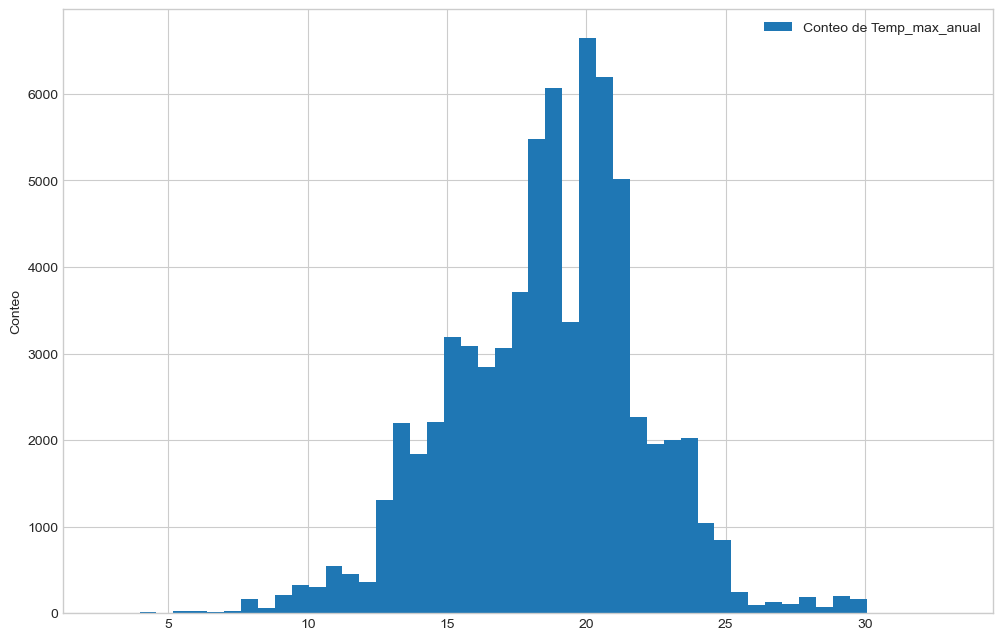

In [19]:
#Histograma de Temperatura maxima anual
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['temp_max_anual'], bins=50, label="Conteo de Temp_max_anual")
plt.legend()
plt.ylabel("Conteo");

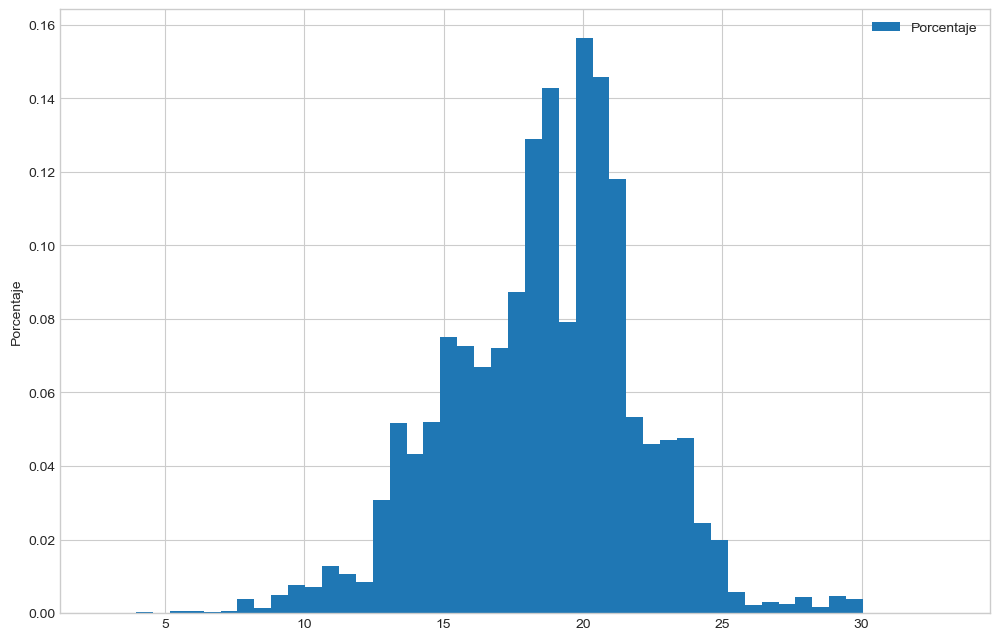

In [20]:
#Temp_max_anual en porcentajes
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['temp_max_anual'], bins=50, label="Porcentaje", density=True)
plt.legend();
plt.ylabel("Porcentaje");

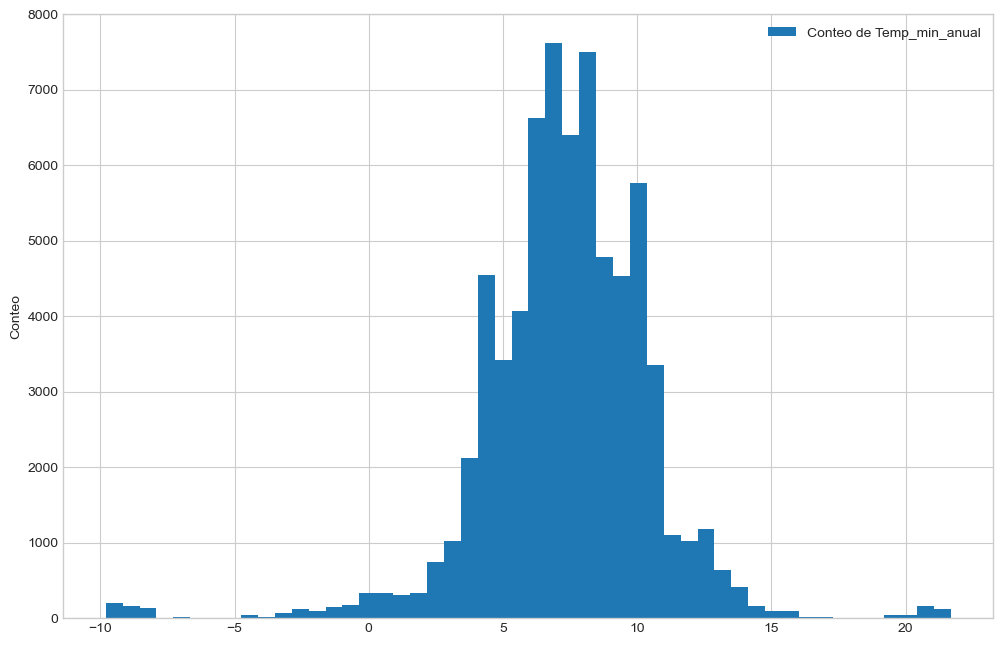

In [21]:
#Histograma de Temperatura mínima anual
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['temp_min_anual'], bins=50, label="Conteo de Temp_min_anual")
plt.legend()
plt.ylabel("Conteo");

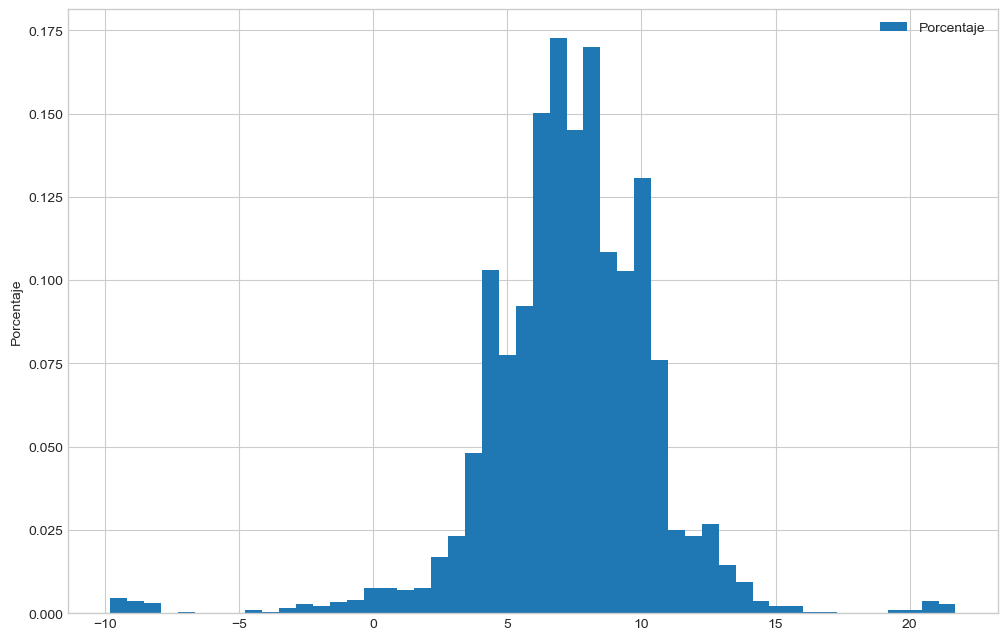

In [22]:
#Temp_min_anual en porcentajes
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['temp_min_anual'], bins=50, label="Porcentaje", density=True)
plt.legend();
plt.ylabel("Porcentaje");

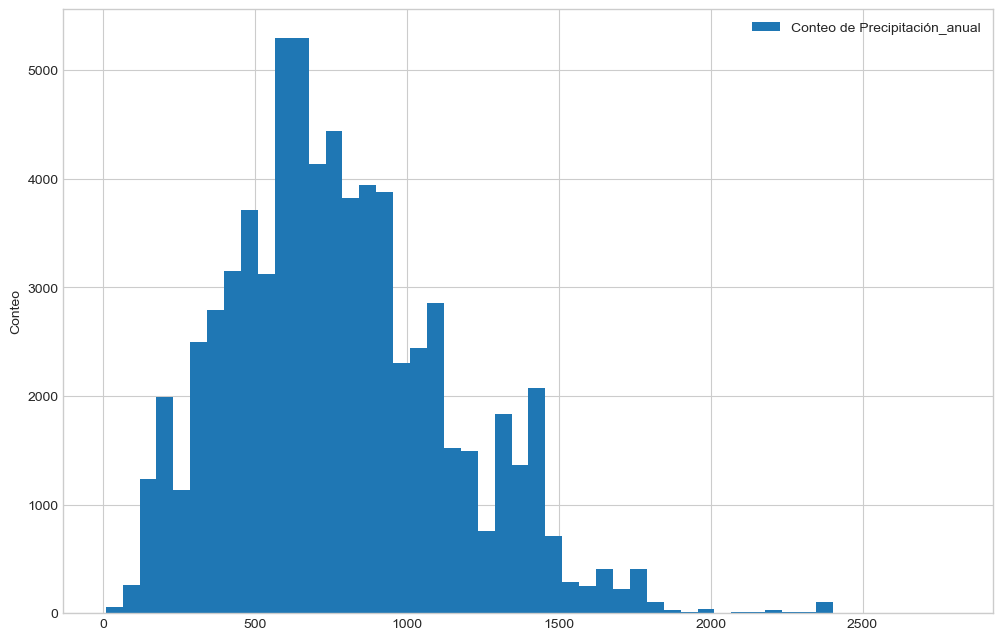

In [23]:
#Histograma de precipitación anual
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['pre_anual'], bins=50, label="Conteo de Precipitación_anual")
plt.legend()
plt.ylabel("Conteo");

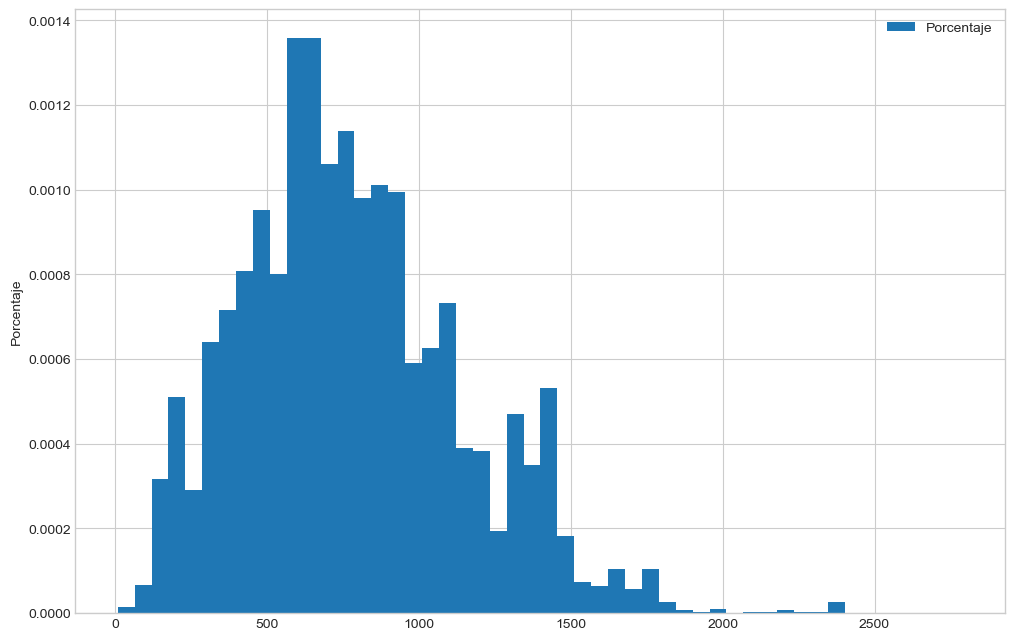

In [24]:
#Precipitación_anual en porcentajes
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['pre_anual'], bins=50, label="Porcentaje", density=True)
plt.legend();
plt.ylabel("Porcentaje");

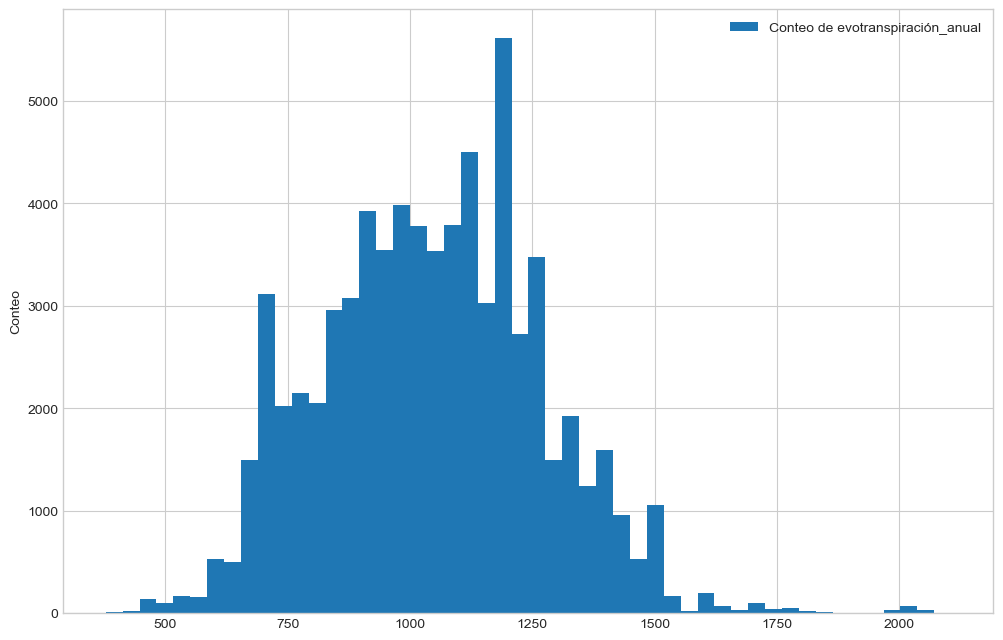

In [25]:
#Histograma de evotranspiración anual
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['etp_anual'], bins=50, label="Conteo de evotranspiración_anual")
plt.legend()
plt.ylabel("Conteo");

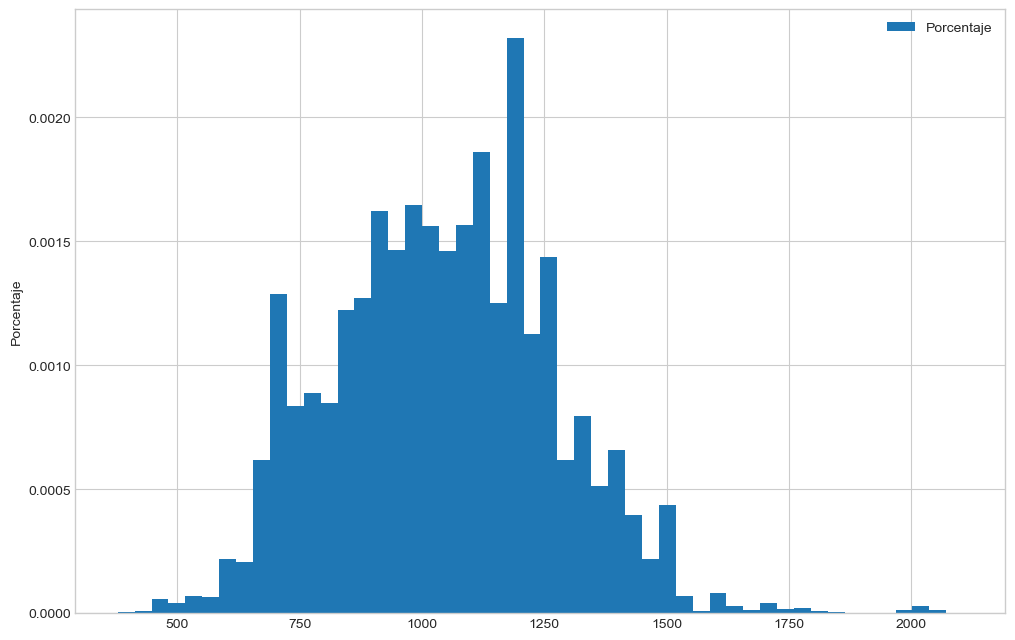

In [26]:
#evotranspiración_anual en porcentajes
plt.figure(figsize=(12,8), dpi= 100)
plt.hist(df['etp_anual'], bins=50, label="Porcentaje", density=True)
plt.legend();
plt.ylabel("Porcentaje");

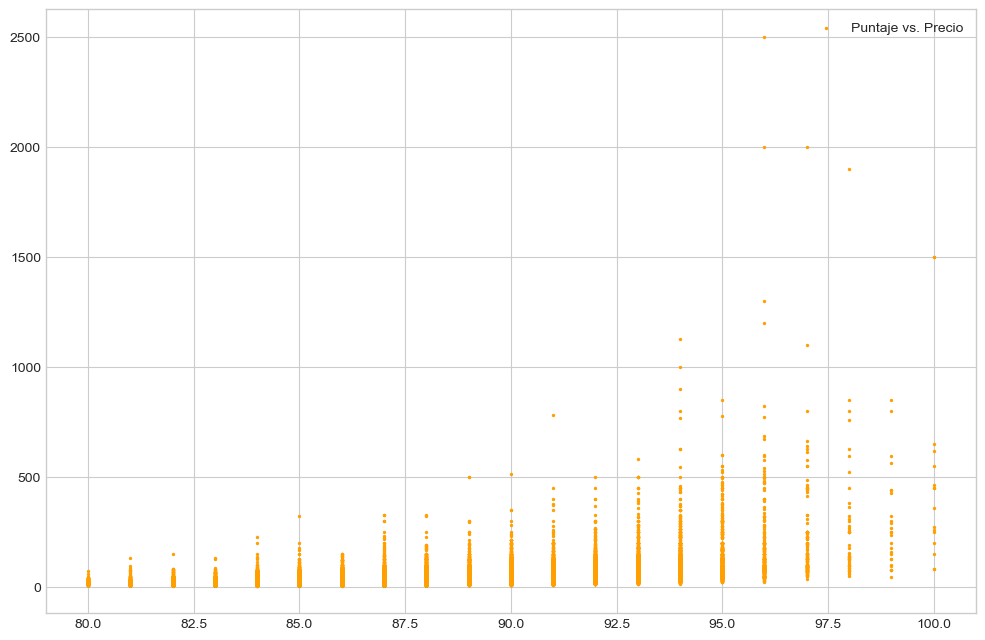

In [27]:
#Scatter entre puntaje y precios
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['points'], df['price'], s=2, label="Puntaje vs. Precio", color="#FFA000")
plt.legend();
plt.show()

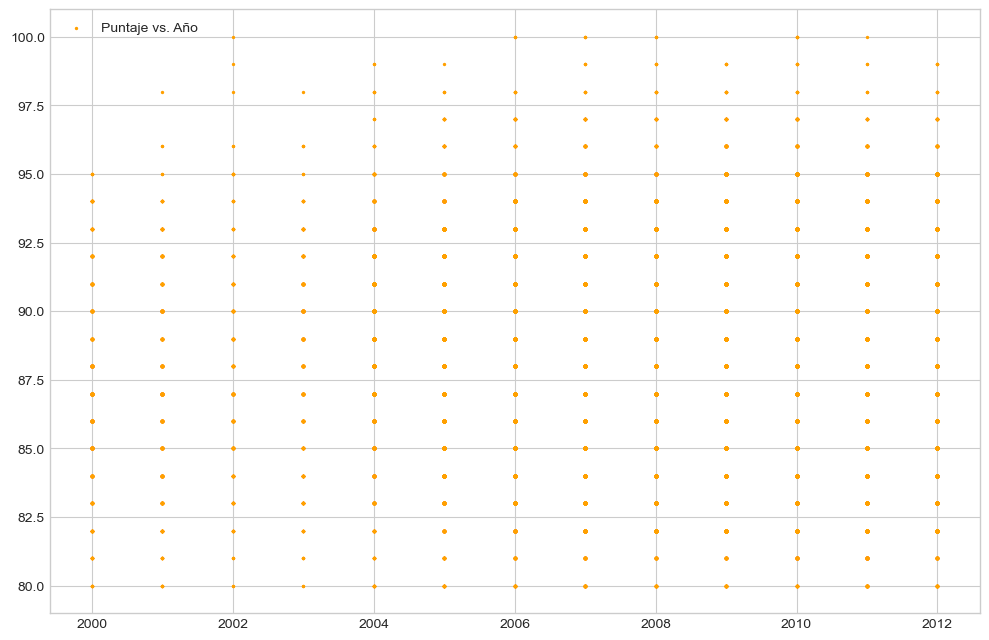

In [28]:
#Scatter entre puntaje y año
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['Year'], df['points'], s=2, label="Puntaje vs. Año", color="#FFA000")
plt.legend();
plt.show()

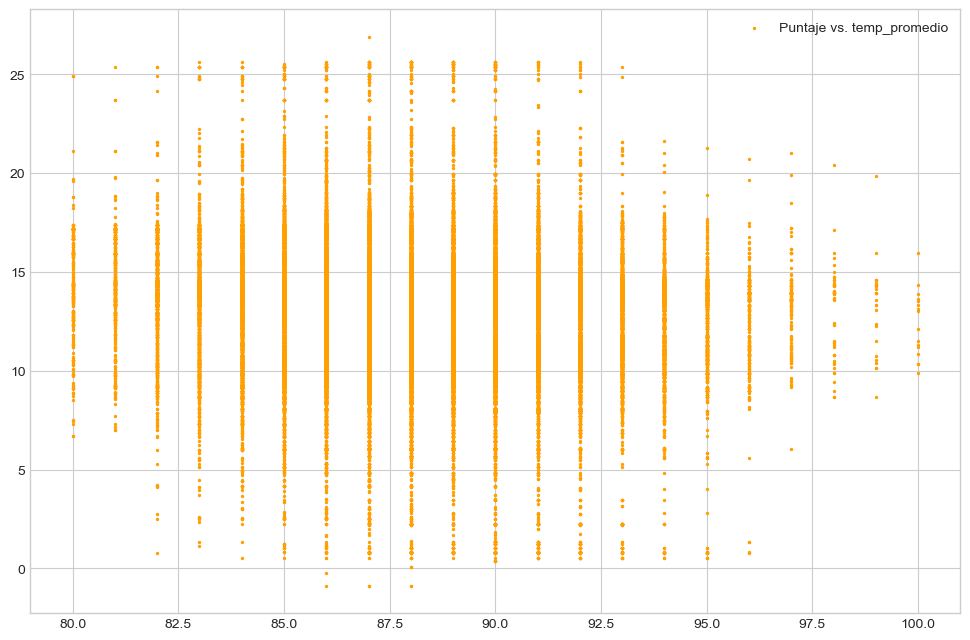

In [29]:
#Scatter entre puntaje y temperatura
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['points'], df['temp_anual'], s=2, label="Puntaje vs. temp_promedio", color="#FFA000")
plt.legend();
plt.show()

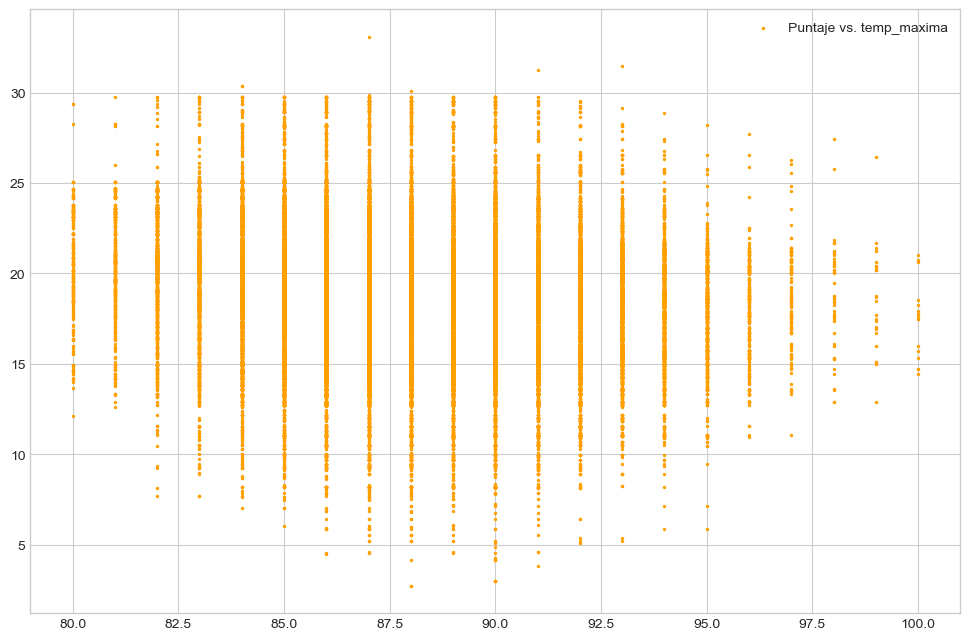

In [30]:
#Scatter entre puntaje y temperatura máxima
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['points'], df['temp_max_anual'], s=2, label="Puntaje vs. temp_maxima", color="#FFA000")
plt.legend();
plt.show()

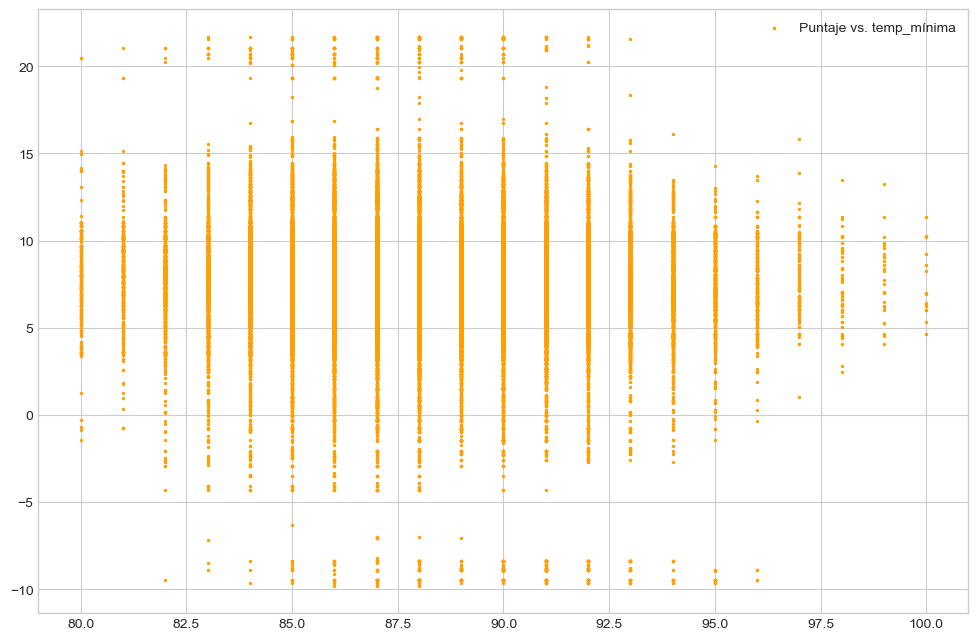

In [31]:
#Scatter entre puntaje y temperatura mínima
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['points'], df['temp_min_anual'], s=2, label="Puntaje vs. temp_mínima", color="#FFA000")
plt.legend();
plt.show()

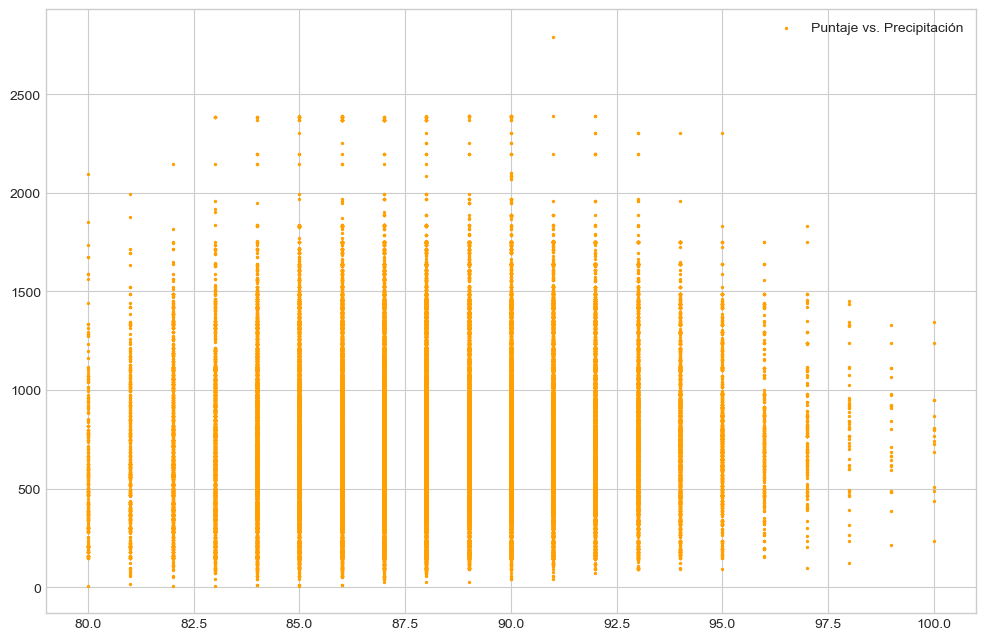

In [32]:
#Scatter entre puntaje y precipitación
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['points'], df['pre_anual'], s=2, label="Puntaje vs. Precipitación", color="#FFA000")
plt.legend();
plt.show()

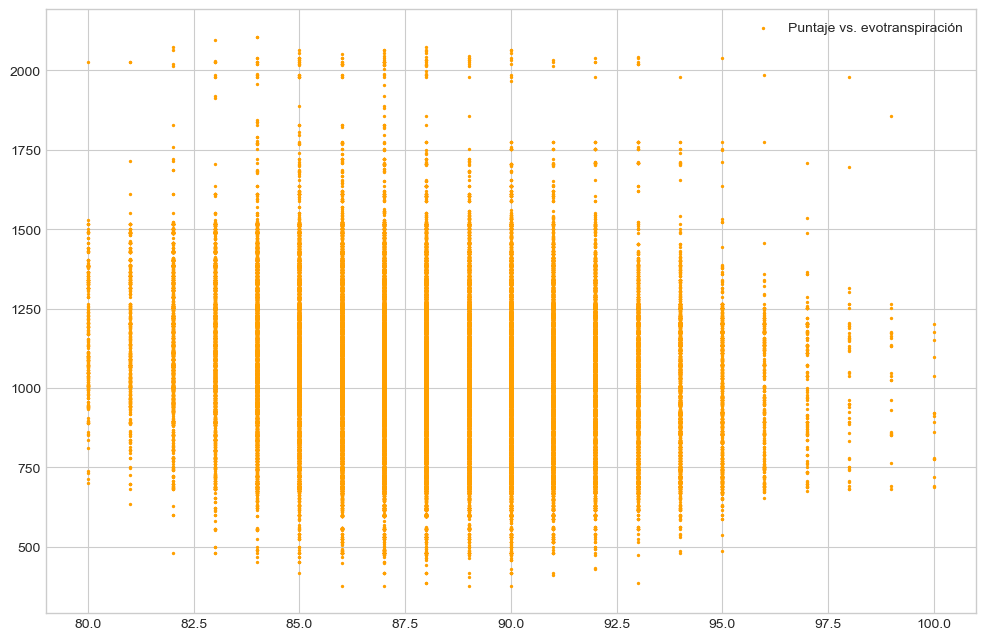

In [33]:
#Scatter entre puntaje y evotranspiración
plt.figure(figsize=(12,8), dpi= 100)
plt.scatter(df['points'], df['etp_anual'], s=2, label="Puntaje vs. evotranspiración", color="#FFA000")
plt.legend();
plt.show()

# Histrogramas

### Latitudes Vs. Puntajes

Se utilizará, basandose en la ley de pareto, las calificaciones del 20% de los mejores vinos. Para esto, como los vinos son calificados de 80 a 100, el 20% es el puntaje de 96 a 100. Con esta información, separamos las diferentes zonas de Latitudes con respecto a los trópicos, los cuales determinan las zonas de calor.

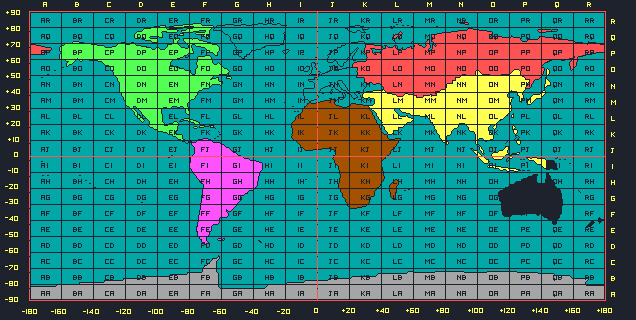

Con esto, realizamos el cruce gráfico de estas zonas, buscando ciertas conclusiones sobre las zonas geográficas contra la calidad de los vinos. No se graficarán datos sobre los círculos árticos y antárticos ya que no se encuentra información en nuestra base de datos de algún vino en estas zonas 

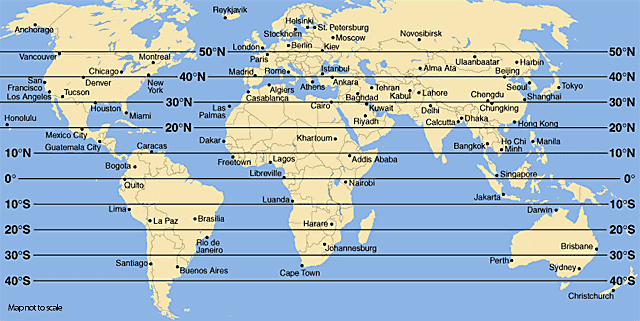

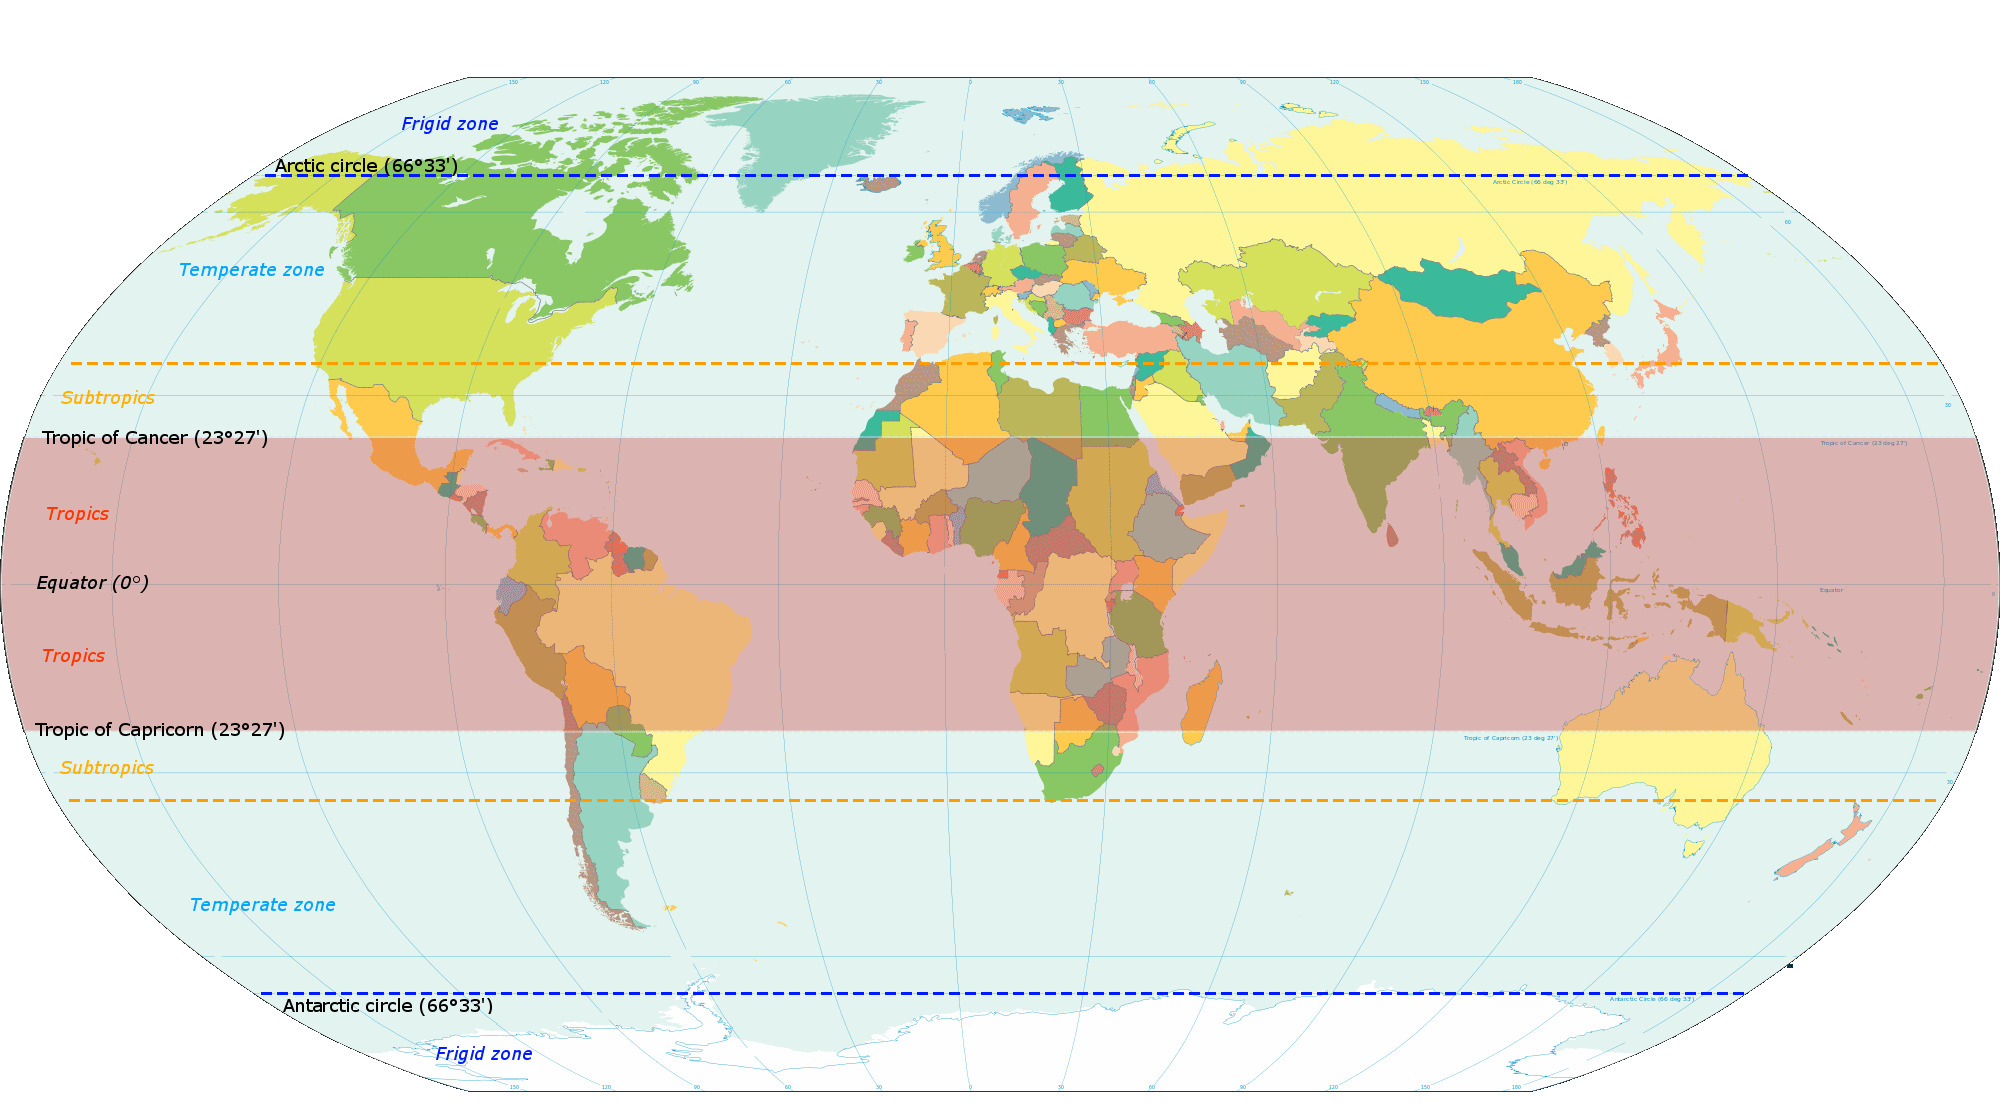

In [34]:
#Se carga la información en EDA
eda = df_simple

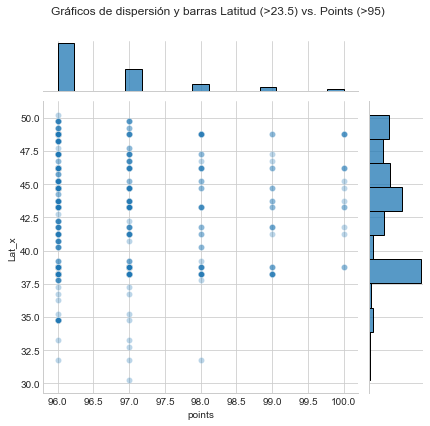

In [35]:
#Trópico de Cancer
df = eda[(eda.points>95) & (eda.Lat_x>23.5)]
p = sns.jointplot(x=df.points,y=df.Lat_x, alpha=0.3);
p.fig.suptitle("Gráficos de dispersión y barras Latitud (>23.5) vs. Points (>95)")

p.fig.subplots_adjust(top=0.90)
plt.show()

**Conclusion** Se encuentra una mayor concentración de vinos de buena calidad en las latitudes cercanas a los 38°, 44°, 45° y 46°; esta característica tambien se puede percibir ligeramente con los vinos de puntaje 99 y 100, con buenos vinos en los 49°

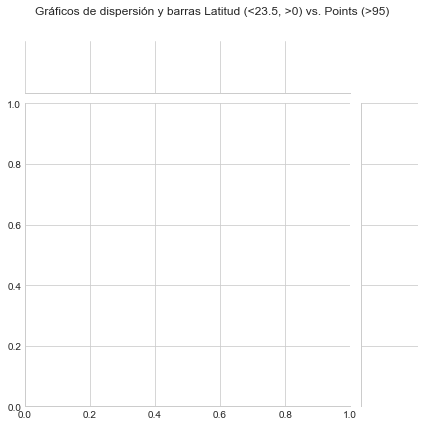

In [36]:
#Ecuador Norte
df = eda[(eda.points>95) & (eda.Lat_x<23.5) & (eda.Lat_x>0)]
p = sns.jointplot(x=df.points,y=df.Lat_x, alpha=0.3);
p.fig.suptitle("Gráficos de dispersión y barras Latitud (<23.5, >0) vs. Points (>95)")

p.fig.subplots_adjust(top=0.90)
plt.show()

**Conclusion** No se enceuntra ningún vino en esta zona. Esto muestra que la zona del Ecuador Norte no posee buenas zonas y/o condiciones para sembrar vinos

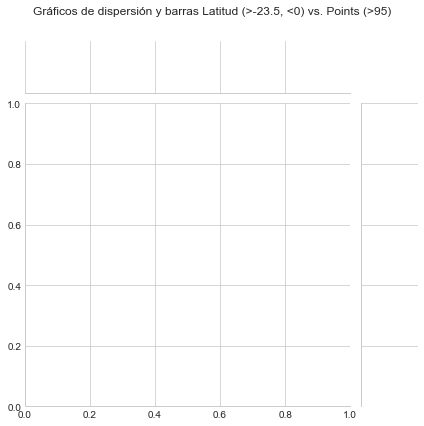

In [37]:
#Ecuador Sur
df = eda[(eda.points>95) & (eda.Lat_x>-23.5) & (eda.Lat_x<0)]
p = sns.jointplot(x=df.points,y=df.Lat_x, alpha=0.3);
p.fig.suptitle("Gráficos de dispersión y barras Latitud (>-23.5, <0) vs. Points (>95)")

p.fig.subplots_adjust(top=0.90)
plt.show()

**Conclusion** No se encuentra ningún vino en esta zona. Esto muestra que la zona del Ecuador Norte no posee buenas zonas y/o condiciones para sembrar vinos

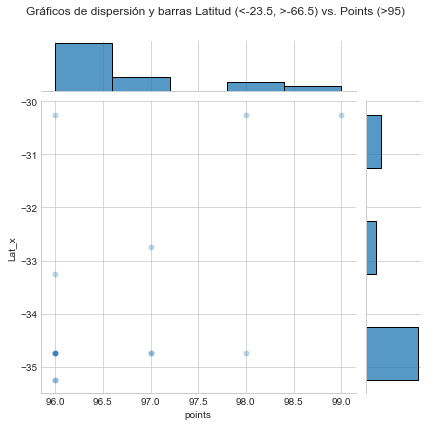

In [38]:
#Trópico de Capricornio
df = eda[(eda.points>95) & (eda.Lat_x<-23.5) & (eda.Lat_x>-66.5)]
p = sns.jointplot(x=df.points,y=df.Lat_x, alpha=0.3);
p.fig.suptitle("Gráficos de dispersión y barras Latitud (<-23.5, >-66.5) vs. Points (>95)")

p.fig.subplots_adjust(top=0.90)
plt.show()

**Conclusion** En este gráfico se encuentra un número bajo de calificaciones, debido a que la cantidad de muestras es mucho mayor en la zona norte a comparación de la zona sur. En este caso, se ve que los mejores vinos se encuentran alrededor de los -35°/-36° hacia el sur.

### Longitudes Vs. Puntaje

Se realiza el análisis análogo al de Latitudes, esta vez no se tienen zonas para los meridianos, por lo que se separarán en las siguientes zonas:
1. Este USA (EU): -160° a -100°
2. Oeste USA y LATAM (OUL): -100° a -20°
3. Este Europa y Africa (EEA): -20° a 30°
4. Oeste Europa y Emiratos Árabes (OEEA): 30° a 70°
5. Asia y Oceanía (AO): 70° a 180°

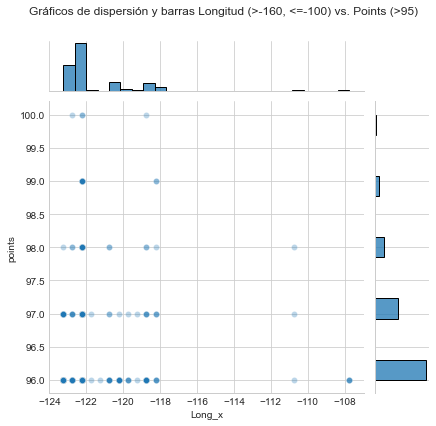

In [39]:
#Zona EU
df = eda[(eda.points>95) & (eda.Long_x>-160) & (eda.Long_x<=-100)]
p = sns.jointplot(x=df.Long_x,y=df.points, alpha=0.3);
p.fig.suptitle("Gráficos de dispersión y barras Longitud (>-160, <=-100) vs. Points (>95)")

p.fig.subplots_adjust(top=0.90)
plt.show()

**Conclusion** Los mejores vinos se dan en las Longitudes alrededor de los -123.5° y -118°, que comprende la región de California. Aunque hay algunos vinos en la zona de -111° a -107°, es interesante analizar zonas con buenas latitudes para zonas de siembra y producción, sobre todo en lugares con acceso a buenas fuentes hídricas u oceanos.

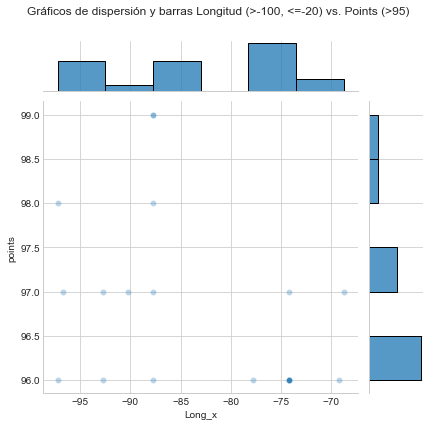

In [40]:
#Zona OUL
df = eda[(eda.points>95) & (eda.Long_x>-100) & (eda.Long_x<=-20)]
p = sns.jointplot(x=df.Long_x,y=df.points, alpha=0.3);
p.fig.suptitle("Gráficos de dispersión y barras Longitud (>-100, <=-20) vs. Points (>95)")

p.fig.subplots_adjust(top=0.90)
plt.show()

**Conclusion** Los mejores vinos se dan en múltiples longitudes, con concentración entre los -97° y -87°

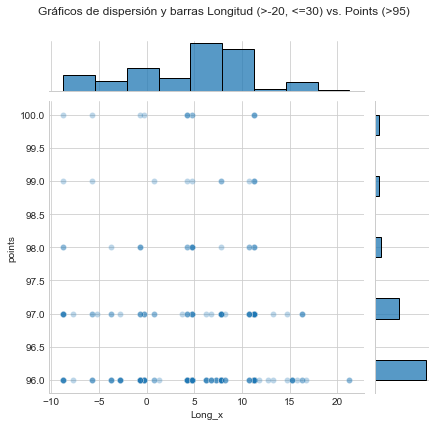

In [41]:
#Zona EEA
df = eda[(eda.points>95) & (eda.Long_x>-20) & (eda.Long_x<=30)]
p = sns.jointplot(x=df.Long_x,y=df.points, alpha=0.3);
p.fig.suptitle("Gráficos de dispersión y barras Longitud (>-20, <=30) vs. Points (>95)")

p.fig.subplots_adjust(top=0.90)
plt.show()

**Conclusion** Los mejores vinos se encuentran distribuidos, con una mayor concentración entre los -9° y 12°, la cual es la zona comprendida para España, Francia e Italia.

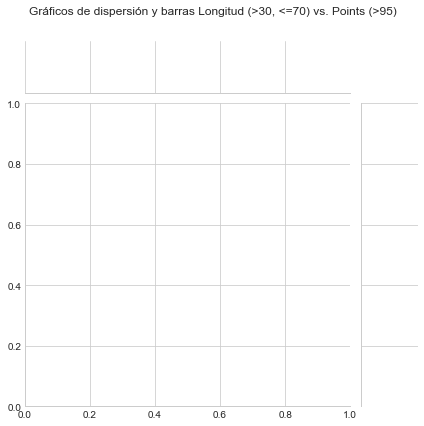

In [42]:
#Zona OEEA
df = eda[(eda.points>95) & (eda.Long_x>30) & (eda.Long_x<=70)]
p = sns.jointplot(x=df.Long_x,y=df.points, alpha=0.3);
p.fig.suptitle("Gráficos de dispersión y barras Longitud (>30, <=70) vs. Points (>95)")

p.fig.subplots_adjust(top=0.90)
plt.show()

**Conclusion** No se encontraron datos de esta zona.

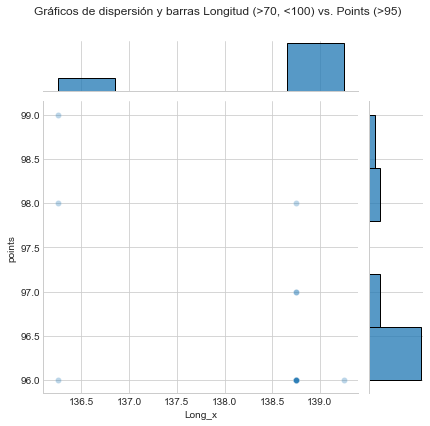

In [43]:
#Zona AO
df = eda[(eda.points>95) & (eda.Long_x>70) & (eda.Long_x<180)]
p = sns.jointplot(x=df.Long_x,y=df.points, alpha=0.3);
p.fig.suptitle("Gráficos de dispersión y barras Longitud (>70, <100) vs. Points (>95)")

p.fig.subplots_adjust(top=0.90)
plt.show()

**Conclusion** Los datos encontrados hacen referencia a Australia, con la mayoría de vinos entre los 138° y 140°.